In [2]:
%cd '/content/drive/My Drive/AI'

/content/drive/My Drive/AI


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.initializers import RandomNormal
from keras.regularizers import l1


# ساخت دیتاست جدید خطی





In [4]:
new_file = open('data.csv', 'w')

for i in range(10000):
    weights = np.array([-1.7, 1.35, 8.75]).reshape((1, 3))
    x = np.random.randn(3) * 5
    y = np.matmul(weights, x) + 17.76
    new_file.write(
        ','.join(map(str, list(x) + list(y)))
    )
    new_file.write('\n')

new_file.close()

In [5]:
dataframe = pd.read_csv("data.csv")

In [6]:
nn_input = np.asarray(dataframe.iloc[:,0:dataframe.shape[1]-1])
nn_output = np.asarray(dataframe.iloc[:,-1])

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# تقسیم بندی داده ها به سه دسته ی مستقل آموزشی و ارزیاب و تست


In [7]:
from sklearn.model_selection import train_test_split 
x_train, x_temp, y_train, y_temp = train_test_split( nn_input, nn_output, test_size = 0.1, random_state = 55) 
x_valid, x_test, y_valid, y_test = train_test_split( x_temp, y_temp, test_size = 0.1, random_state = 65) 

In [9]:
x_train.shape, x_valid.shape, x_test.shape

((8999, 3), (900, 3), (100, 3))

# <center dir="rtl"> مدل اول </center>

<div dir="rtl">

در این مدل شبکه ای پیاده سازی شده است که سه لایه دارد، لایه ی اول شامل ۳۰ نرون، لایه ی دوم شامل ۵۰ نرون و لایه ی آخر که خروجی است یک نرون دارد


استفاده شده است MSE Lossدر این شبکه از

بعنوان تابع بهینه ساز استفاده شده است Adamهمچنین از تابع 


:نتیجه

عملکرد این مدل را بررسی  MAE ,MSE با استفاده از معیارهای epochs بعد از آموزش شبکه به اندازه ی ۱۰۰ 
می کنیم


MSE = 0.668      ,     MAE = 0.035
</div>


Epoch 1/100
1/1 [==============================] - 1s 740ms/step - loss: 2314.8289 - mse: 2314.8289 - mae: 38.6800 - mape: 136.7863
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 2281.8518 - mse: 2281.8518 - mae: 38.3961 - mape: 137.1825
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 2248.9851 - mse: 2248.9851 - mae: 38.1106 - mape: 137.5745
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 2216.2314 - mse: 2216.2314 - mae: 37.8260 - mape: 137.9946
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 2183.5874 - mse: 2183.5874 - mae: 37.5426 - mape: 138.4501
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 2151.0405 - mse: 2151.0405 - mae: 37.2574 - mape: 138.9083
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 2118.5735 - mse: 2118.5735 - mae: 36.9703 - mape: 139.3723
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 2086.1665 - mse: 

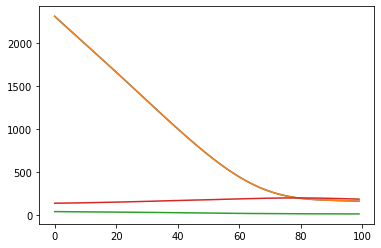

In [21]:
model1 = Sequential()

model1.add(Dense(30, input_dim=dataframe.shape[1]-1))
model1.add(Dense(50))
model1.add(Dense(1))

model1.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])

history = model1.fit(x_test, y_test, epochs=100, batch_size=len(x_test), verbose=1)

predictions = model1.predict(x_test)
print("\n___________________________________________________________")
MSE = np.sum(np.sqrt(np.mean(np.square(predictions - y_test))))/y_test.shape[0]
MAE = np.sum(np.sqrt(np.abs(np.mean(predictions - y_test))))/y_test.shape[0]
print("MSE: ", MSE)
print("MAE: ", MAE)  

plt.plot(history.history['loss'])
plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.plot(history.history['mape'])
plt.show()


# <center dir="rtl"> مدل دوم </center>

<div dir="rtl">

در این مدل شبکه ای پیاده سازی شده است که ۷ لایه دارد و هز لایه به ترتیب ۲۰۰، ۵۰۰، ۸۰۰، ۹۰۰، ۵۰۰،، ۱۰۰ و
لایه ی آخر یک نرون دارد

بعنوان تابع فعال ساز در همه ی لایه ها از Relu استفاده کرده ایم  


در این شبکه از تابع بهینه ساز Adagrad 
استفاده میکنیم 

همچنین مدل ۲۰۰ ایپاک آموزش داده  شده است

در این شبکه از تابع بهینه ساز MSE استفاده شده است

:نتیجه

MSE = 0.665     ,      MAE = 0.0008

</div>


Epoch 1/200
563/563 [==============================] - 6s 8ms/step - loss: 216.6285 - mse: 205.6208 - mae: 8.1173 - mape: 74.5363 - val_loss: 22.0779 - val_mse: 11.5025 - val_mae: 2.7738 - val_mape: 49.7006
Epoch 2/200
563/563 [==============================] - 4s 7ms/step - loss: 19.4084 - mse: 9.2574 - mae: 2.4234 - mape: 36.0110 - val_loss: 31.5110 - val_mse: 21.4966 - val_mae: 4.1898 - val_mape: 67.0715
Epoch 3/200
563/563 [==============================] - 4s 7ms/step - loss: 11.5791 - mse: 1.8558 - mae: 0.8931 - mape: 8.6671 - val_loss: 9.9183 - val_mse: 0.4439 - val_mae: 0.4206 - val_mape: 6.6710
Epoch 4/200
563/563 [==============================] - 4s 7ms/step - loss: 9.6544 - mse: 0.5270 - mae: 0.4667 - mape: 5.8423 - val_loss: 9.3905 - val_mse: 0.4246 - val_mae: 0.4841 - val_mape: 7.2321
Epoch 5/200
563/563 [==============================] - 4s 7ms/step - loss: 9.0676 - mse: 0.4504 - mae: 0.4174 - mape: 4.3269 - val_loss: 8.7761 - val_mse: 0.2764 - val_mae: 0.3642 - val_mape

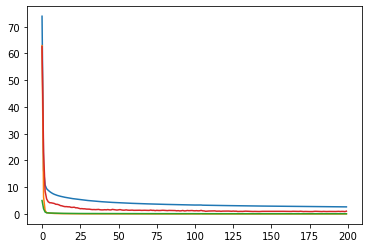

In [ ]:
model2 = Sequential()
model2.add(Dense(200, input_dim=dataframe.shape[1]-1, activity_regularizer=l1(0.005)))
model2.add(Activation('relu'))
model2.add(Dense(500, activity_regularizer=l1(0.006)))
model2.add(Activation('relu'))
model2.add(Dense(800, activity_regularizer=l1(0.004)))
model2.add(Activation('relu'))
model2.add(Dense(900, activity_regularizer=l1(0.004)))
model2.add(Activation('relu'))
model2.add(Dense(500, activity_regularizer=l1(0.004)))
model2.add(Activation('relu'))
model2.add(Dense(100, activity_regularizer=l1(0.004)))
model2.add(Activation('relu'))
model2.add(Dense(1, activity_regularizer=l1(0.002)))

model2.compile(loss='mse',
                  optimizer='adagrad',
                  metrics=['mse', 'mae', 'mape'])

history = model2.fit(x_train, y_train, epochs = 200,
                        validation_data=(x_valid, y_valid),
                        batch_size = 16, verbose = 1)

predictions = model2.predict(x_test)
print("\n___________________________________________________________")
MSE = np.sum(np.sqrt(np.mean(np.square(predictions - y_test))))/y_test.shape[0]
MAE = np.sum(np.sqrt(np.abs(np.mean(predictions - y_test))))/y_test.shape[0]
print("MSE: ", MSE)
print("MAE: ", MAE)  

plt.plot(history.history['loss'])
plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.plot(history.history['mape'])
plt.show()

## <center dir="rtl"> تحلیل عملکرد مدل دوم روی داده های زمان آموزش و تست </center>

<div dir="rtl">

با بررسی معیارهای MSE و MAE
روی داده های آموزشی میبینیم که این دو معیار بسیار به صفر نزدیک بودند و 
آنچه که در زمان تست بدست آوردیم بسیار تفاوت دارند ازین رو متوجه میشویم که مدل آورفیت شده و مشکل بیش برازش دارد
علت این مشکل، پیچیده شدن بیش از حد شبکه است بطوری که میتوان گفت شبکه توانسته داده های آموزشی را حفظ میکند اما در زمان مواجهه با داده های جدید با شکست روبرو شده است. در واقع ما در این حالت نتوانسته این بخوبی از امکانات شبکه استفاده کنیم

برای رفع این مشکل شبکه سوم را طراحی میکنیم

</div>


## <center dir="rtl"> مدل سوم </center>

<div dir="rtl">

:شبکه قبلی دچار مشکل بیش برازش شده بود برای رفع این مشکل از دو راه حل استفاده کرده ایم

استفاده از Drop out برای منظم سازی

استفاده از تابع بهینه ساز
rmsprop
که برای مسئله رگرسیون تابع بهینه ساز مناسب تری است

دیگر ویژگیهای این شبکه تماما مثل شبکه قبلی می باشد

نتیجه:

MSE = 0.558       ,       MAE = 0.03

 تغییرات اعمال شده موجب به رفع مشکل بیش برازش شده و مدل بهبود پیدا کرده است




</div>


Epoch 1/200
563/563 [==============================] - 9s 11ms/step - loss: 413.5635 - mse: 403.8002 - mae: 13.5484 - mape: 103.7635 - val_loss: 166.5539 - val_mse: 157.9281 - val_mae: 10.3097 - val_mape: 69.7072
Epoch 2/200
563/563 [==============================] - 6s 10ms/step - loss: 189.4266 - mse: 179.7272 - mae: 9.0893 - mape: 57.7302 - val_loss: 71.6363 - val_mse: 61.9905 - val_mae: 5.8360 - val_mape: 59.2093
Epoch 3/200
563/563 [==============================] - 6s 10ms/step - loss: 164.0379 - mse: 154.2132 - mae: 8.5679 - mape: 61.0706 - val_loss: 26.7608 - val_mse: 17.3815 - val_mae: 3.2621 - val_mape: 30.1356
Epoch 4/200
563/563 [==============================] - 6s 10ms/step - loss: 156.3878 - mse: 147.0872 - mae: 8.0680 - mape: 48.7306 - val_loss: 118.3793 - val_mse: 109.1054 - val_mae: 8.4541 - val_mape: 80.7164
Epoch 5/200
563/563 [==============================] - 6s 10ms/step - loss: 156.3850 - mse: 146.8960 - mae: 8.0713 - mape: 50.8418 - val_loss: 37.5379 - val_mse:

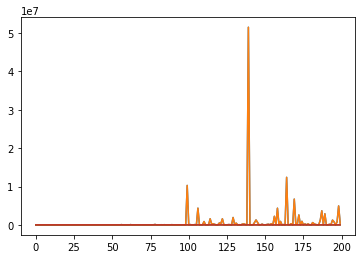

In [ ]:
model3 = Sequential()
model3.add(Dense(200, input_dim=dataframe.shape[1]-1, activity_regularizer=l1(0.005)))
model3.add(Activation('relu'))
model3.add(Dropout(0.1))
model3.add(Dense(500, activity_regularizer=l1(0.006)))
model3.add(Activation('relu'))
model3.add(Dropout(0.2))
model3.add(Dense(800, activity_regularizer=l1(0.004)))
model3.add(Activation('relu'))
model3.add(Dropout(0.3))
model3.add(Dense(900, activity_regularizer=l1(0.004)))
model3.add(Activation('relu'))
model3.add(Dropout(0.3))
model3.add(Dense(500, activity_regularizer=l1(0.004)))
model3.add(Activation('relu'))
model3.add(Dropout(0.2))
model3.add(Dense(100, activity_regularizer=l1(0.004)))
model3.add(Activation('relu'))
model3.add(Dropout(0.4))
model3.add(Dense(1, activity_regularizer=l1(0.002)))

model3.compile(loss='mse',
                  optimizer='rmsprop',
                  metrics=['mse', 'mae', 'mape'])

history = model3.fit(x_train, y_train, epochs = 200,
                        validation_data=(x_valid, y_valid),
                        batch_size = 16, verbose = 1)

predictions = model3.predict(x_test)
print("\n___________________________________________________________")
MSE = np.sum(np.sqrt(np.mean(np.square(predictions - y_test))))/y_test.shape[0]
MAE = np.sum(np.sqrt(np.abs(np.mean(predictions - y_test))))/y_test.shape[0]
print("MSE: ", MSE)
print("MAE: ", MAE)  

plt.plot(history.history['loss'])
plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.plot(history.history['mape'])
plt.show()

## <center dir="rtl"> مدل چهارم </center>

<div dir="rtl">

حالا که با افزودن
Drop out
به شبکه و همچنین تغییر تابع بهینه ساز توانستیم بر بیش برازش چیره شویم امتحان
میکنیم که آیا افزایش میزان
Drop out
نرونها به شبکه قبلی، آیا موجب بهبود کارائی میشود یا خیر



نتیجه:

MSE = 0.545        ,         MAE = 0.042

همانطور که مشخص است این تغییرات تاثیر مثبتی داشته و موجب به بهبود عملکرد مدل شده است

</div>


Epoch 1/200
563/563 [==============================] - 9s 11ms/step - loss: 414.0558 - mse: 403.2157 - mae: 13.6641 - mape: 135.3145 - val_loss: 128.9147 - val_mse: 120.3411 - val_mae: 8.4379 - val_mape: 51.7812
Epoch 2/200
563/563 [==============================] - 5s 10ms/step - loss: 211.7258 - mse: 200.8719 - mae: 9.5227 - mape: 72.3259 - val_loss: 49.9409 - val_mse: 38.4913 - val_mae: 4.5642 - val_mape: 53.8096
Epoch 3/200
563/563 [==============================] - 5s 10ms/step - loss: 184.5857 - mse: 172.9756 - mae: 8.9495 - mape: 74.8543 - val_loss: 147.5592 - val_mse: 136.6282 - val_mae: 8.0177 - val_mape: 57.1014
Epoch 4/200
563/563 [==============================] - 6s 10ms/step - loss: 173.1556 - mse: 159.9430 - mae: 8.6273 - mape: 59.1325 - val_loss: 145.0326 - val_mse: 133.2814 - val_mae: 7.3161 - val_mape: 65.7111
Epoch 5/200
563/563 [==============================] - 6s 10ms/step - loss: 164.0076 - mse: 149.4231 - mae: 8.3287 - mape: 58.0388 - val_loss: 309.2009 - val_ms

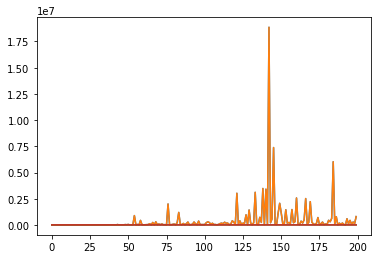

In [37]:
model4 = Sequential()
model4.add(Dense(200, input_dim=dataframe.shape[1]-1, activity_regularizer=l1(0.005)))
model4.add(Activation('relu'))
model4.add(Dropout(0.2))
model4.add(Dense(500, activity_regularizer=l1(0.006)))
model4.add(Activation('relu'))
model4.add(Dropout(0.3))
model4.add(Dense(800, activity_regularizer=l1(0.004)))
model4.add(Activation('relu'))
model4.add(Dropout(0.4))
model4.add(Dense(900, activity_regularizer=l1(0.004)))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(500, activity_regularizer=l1(0.004)))
model4.add(Activation('relu'))
model4.add(Dropout(0.4))
model4.add(Dense(100, activity_regularizer=l1(0.004)))
model4.add(Activation('relu'))
model4.add(Dropout(0.3))
model4.add(Dense(1, activity_regularizer=l1(0.002)))

model4.compile(loss='mse',
                  optimizer='rmsprop',
                  metrics=['mse', 'mae', 'mape'])

history = model4.fit(x_train, y_train, epochs = 200,
                        validation_data=(x_valid, y_valid),
                        batch_size = 16, verbose = 1)

predictions = model4.predict(x_test)
print("\n___________________________________________________________")
MSE = np.sum(np.sqrt(np.mean(np.square(predictions - y_test))))/y_test.shape[0]
MAE = np.sum(np.sqrt(np.abs(np.mean(predictions - y_test))))/y_test.shape[0]
print("MSE: ", MSE)
print("MAE: ", MAE)  

plt.plot(history.history['loss'])
plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.plot(history.history['mape'])
plt.show()

## <center dir="rtl"> مدل پنجم </center>

<div dir="rtl">
این مدل تماما مشابه با مدل قبلی ایست با این تفاوت که بجای استفاده از
MSE
بعنوان تابع خطا از
MAE
استفاده شده است


نتیجه:

MSE = 0.515         ,         MAE = 0.020

همانگونه که انتظار میرود، استفاده از این تابع موجب بهبود معیار
MAE
میشود اما 
MSE
بهبودی نداشته است
</div>


Epoch 1/200
563/563 [==============================] - 9s 11ms/step - loss: 19.9519 - mse: 426.4093 - mae: 13.9323 - mape: 102.2246 - val_loss: 10.7967 - val_mse: 106.2494 - val_mae: 6.6380 - val_mape: 28.6678
Epoch 2/200
563/563 [==============================] - 5s 10ms/step - loss: 14.1167 - mse: 207.2478 - mae: 9.9059 - mape: 61.3706 - val_loss: 16.5142 - val_mse: 391.6456 - val_mae: 14.0454 - val_mape: 67.3762
Epoch 3/200
563/563 [==============================] - 5s 10ms/step - loss: 12.2471 - mse: 178.1219 - mae: 8.9196 - mape: 55.4204 - val_loss: 13.0513 - val_mse: 231.1237 - val_mae: 10.9435 - val_mape: 64.5027
Epoch 4/200
563/563 [==============================] - 5s 10ms/step - loss: 11.0807 - mse: 158.9942 - mae: 8.3463 - mape: 54.4149 - val_loss: 7.8213 - val_mse: 58.7597 - val_mae: 5.7898 - val_mape: 25.7163
Epoch 5/200
563/563 [==============================] - 5s 10ms/step - loss: 10.4729 - mse: 157.3472 - mae: 8.1049 - mape: 66.9168 - val_loss: 9.2577 - val_mse: 125.60

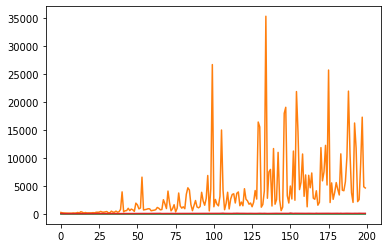

In [35]:
model5 = Sequential()
model5.add(Dense(200, input_dim=dataframe.shape[1]-1, activity_regularizer=l1(0.005)))
model5.add(Activation('relu'))
model5.add(Dropout(0.2))
model5.add(Dense(500, activity_regularizer=l1(0.006)))
model5.add(Activation('relu'))
model5.add(Dropout(0.3))
model5.add(Dense(800, activity_regularizer=l1(0.004)))
model5.add(Activation('relu'))
model5.add(Dropout(0.4))
model5.add(Dense(900, activity_regularizer=l1(0.004)))
model5.add(Activation('relu'))
model5.add(Dropout(0.5))
model5.add(Dense(500, activity_regularizer=l1(0.004)))
model5.add(Activation('relu'))
model5.add(Dropout(0.4))
model5.add(Dense(100, activity_regularizer=l1(0.004)))
model5.add(Activation('relu'))
model5.add(Dropout(0.3))
model5.add(Dense(1, activity_regularizer=l1(0.002)))

model5.compile(loss='mae',
                  optimizer='rmsprop',
                  metrics=['mse', 'mae', 'mape'])

history = model5.fit(x_train, y_train, epochs = 200,
                        validation_data=(x_valid, y_valid),
                        batch_size = 16, verbose = 1)

predictions = model5.predict(x_test)
print("\n___________________________________________________________")
MSE = np.sum(np.sqrt(np.mean(np.square(predictions - y_test))))/y_test.shape[0]
MAE = np.sum(np.sqrt(np.abs(np.mean(predictions - y_test))))/y_test.shape[0]
print("MSE: ", MSE)
print("MAE: ", MAE)  

plt.plot(history.history['loss'])
plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.plot(history.history['mape'])
plt.show()

## <center dir="rtl"> مدل ششم </center>

<div dir="rtl">

ساختار اصلی شبکه در این مدل همانند شبکه قبلی است اما در آن از تابع خطای
MAPE
 استفاده شده است. همچنین
ایپاک ها برابر با ۱۰۰۰۰۰۰۰ ست شده است اما به کمک تکنیک 
 early stopping
تنها تا زمانی فرآیند آموزش 
ادامه می یابد که مدل دچار بیش برازش نشده است

نتیجه:

فرآیند آموزش تا ۲۱۷ ایپاک جلو رفت و سپس به پایان رسید

MSE = 0.516       ,        MAE = 0.018

به کمک این تغییرات مدل مجددا بهبود یافته است و
MAE
بدست آمده دچار کاهش شده است
</div>


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10000000
90/90 - 4s - loss: 95.7967 - mse: 1097.4569 - mae: 24.2111 - mape: 87.6219 - val_loss: 72.9248 - val_mse: 519.0693 - val_mae: 14.8276 - val_mape: 63.8966
Epoch 2/10000000
90/90 - 1s - loss: 74.3955 - mse: 579.0230 - mae: 16.9524 - mape: 65.3981 - val_loss: 70.6275 - val_mse: 434.5345 - val_mae: 14.7968 - val_mape: 63.4329
Epoch 3/10000000
90/90 - 1s - loss: 62.0375 - mse: 314.5007 - mae: 12.7371 - mape: 52.8578 - val_loss: 41.4325 - val_mse: 62.2146 - val_mae: 5.8450 - val_mape: 33.6137
Epoch 4/10000000
90/90 - 1s - loss: 53.1054 - mse: 194.1040 - mae: 10.0896 - mape: 44.4273 - val_loss: 38.1549 - val_mse: 106.9204 - val_mae: 7.4141 - val_mape: 30.6816
Epoch 5/10000000
90/90 - 1s - loss: 49.8710 - mse: 178.9488 - mae: 9.5402 - mape: 41.0415 - val_loss: 48.1945 - val_mse: 153.8611 - val_mae: 10.4729 - val_mape: 41.0432
Epoch 6/10000000
90/90 - 1s - loss: 51.1917 - mse: 173.3451 - mae: 9.3453 - mape: 42.1171 - val_loss: 32.8835 - val_mse: 38.9520 - val_mae: 4.7556 - val_

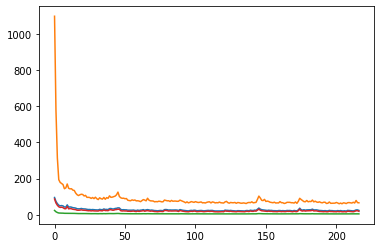

In [36]:
from keras.callbacks import EarlyStopping

model6 = Sequential()
model6.add(Dense(200, input_dim=dataframe.shape[1]-1, activity_regularizer=l1(0.005)))
model6.add(Activation('relu'))
model6.add(Dropout(0.2))
model6.add(Dense(500, activity_regularizer=l1(0.006)))
model6.add(Activation('relu'))
model6.add(Dropout(0.3))
model6.add(Dense(800, activity_regularizer=l1(0.004)))
model6.add(Activation('relu'))
model6.add(Dropout(0.4))
model6.add(Dense(900, activity_regularizer=l1(0.004)))
model6.add(Activation('relu'))
model6.add(Dropout(0.5))
model6.add(Dense(500, activity_regularizer=l1(0.004)))
model6.add(Activation('relu'))
model6.add(Dropout(0.4))
model6.add(Dense(100, activity_regularizer=l1(0.004)))
model6.add(Activation('relu'))
model6.add(Dropout(0.3))
model6.add(Dense(1, activity_regularizer=l1(0.002)))

model3.compile(loss='mape', metrics=['mse', 'mae', 'mape'], optimizer=Adam(lr=1e-3, decay=1e-3 / 200))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

history = model3.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=10000000, batch_size=100, verbose=2, callbacks=[es])

predictions = model3.predict(x_test)
print("\n___________________________________________________________")
MSE = np.sum(np.sqrt(np.mean(np.square(predictions - y_test))))/y_test.shape[0]
MAE = np.sum(np.sqrt(np.abs(np.mean(predictions - y_test))))/y_test.shape[0]
print("MSE: ", MSE)
print("MAE: ", MAE)  

plt.plot(history.history['loss'])
plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.plot(history.history['mape'])
plt.show()

## <center dir="rtl"> نتیجه گیری نهائی </center>

<div dir="rtl">

با بررسی مدلهای گوناگون به این نتیجه رسیدیم که بهترین تابع بهینه ساز در خصوص این مسئله تابع
rmsprop
میباشد

همچنین بسته به اینکه معیار سنجش کارایی مدل ما، چه چیزی است براساس آن تابع خطا را مشخص میکنیم که در حین آموزش همان معیار بهینه سازی شود

از آنجا که نمیدانیم چه تعداد ایپاک برای آموزش شبکه مناسب است از تکنیک
early stopping
استفاده کرده و
و مدل را با تعداد مناسبی ایپاک آموزش میدهیم


اگر از شبکه ساده ای برای آموزش مدل استفاده کنیم از امکانات گسترده شبکه عصبی بی بهره بودیم و اگر از شبکه ای پیچیده به تنهایی استفاده کنیم باز هم شبکه بر روی داده هایی که قبلا مشاهده نکرده عملکرد خوبی ندارد، به همین علت شبکه ای پیچیده میسازیم و با استفاده از تکنیکهای مختلف منظم سازی از آورفیت شدن مدل جلوگیری میکنیم
از جمله این تکنیک ها در مسئله ی رگرسیون میتوان به تکنیک
Drop out
اشاره کرد

</div>
